In [35]:
import tensorflow as tf
from tensorflow.keras import Model, Input, Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.preprocessing.image import ImageDataGenerator


In [36]:
img_height, img_width, img_channels = 180, 180, 3
batch_size=32
training="C:\\Users\\agnes\\Documents\\apziva_ai_residency\\project4\\data\\images\\training"
testing="C:\\Users\\agnes\\Documents\\apziva_ai_residency\\project4\\data\\images\\testing"
loading_dataste_seed = 0

In [17]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    training,
    validation_split=0.2,
    subset="training",
    seed=loading_dataste_seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
    )

Found 2392 files belonging to 2 classes.
Using 1914 files for training.


In [37]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    training,
    validation_split=0.2,
    subset="validation",
    seed=loading_dataste_seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
    )

Found 2392 files belonging to 2 classes.
Using 478 files for validation.


In [38]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    testing,
    seed=loading_dataste_seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
    )

Found 597 files belonging to 2 classes.


In [39]:
classes = train_data.class_names
shape = (img_height, img_width, img_channels)
data = (train_data, val_data, test_data)

In [40]:
train_data, val_data, test_data = data

In [41]:
inputs = Input(shape=shape)
pre_trained_vgg_model = tf.keras.applications.VGG19(include_top=False, weights='imagenet', classifier_activation=None, classes=len(classes))

for layer in pre_trained_vgg_model.layers:
    layer.trainable = False
    layer1 = pre_trained_vgg_model(inputs)
    layer2 = Flatten()(layer1)
    layer3 = Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(layer2)
    outputs = Dense(len(classes), activation='softmax')(layer3)
    vgg_model = Model(inputs=inputs, outputs=outputs)

In [42]:
vgg_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
vgg_model.summary()

Model: "model_131"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, None, None, 512)   20024384  
                                                                 
 flatten_131 (Flatten)       (None, 12800)             0         
                                                                 
 dense_262 (Dense)           (None, 32)                409632    
                                                                 
 dense_263 (Dense)           (None, 2)                 66        
                                                                 
Total params: 20,434,082
Trainable params: 409,698
Non-trainable params: 20,024,384
_________________________________________________________________


In [43]:
vgg_model_hist = vgg_model.fit(
  train_data,
  validation_data=val_data,
  epochs=5
)

Epoch 1/5
60/60 [==============================] - 148s 2s/step - loss: 1.2160 - accuracy: 0.8757 - val_loss: 0.3556 - val_accuracy: 0.9916
Epoch 2/5
60/60 [==============================] - 147s 2s/step - loss: 0.3177 - accuracy: 0.9890 - val_loss: 0.2830 - val_accuracy: 0.9895
Epoch 3/5
60/60 [==============================] - 148s 2s/step - loss: 0.2496 - accuracy: 0.9948 - val_loss: 0.2224 - val_accuracy: 0.9958
Epoch 4/5
60/60 [==============================] - 148s 2s/step - loss: 0.2040 - accuracy: 0.9984 - val_loss: 0.1953 - val_accuracy: 0.9958
Epoch 5/5
60/60 [==============================] - 149s 2s/step - loss: 0.1708 - accuracy: 1.0000 - val_loss: 0.1671 - val_accuracy: 0.9895


In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def eval_model(model, test_data):   
    results={}
    predicted_labels = []
    true_labels = []
    all_images = []
    for images, labels in test_data:
        true_labels.extend(labels.numpy())
        predicted_labels.extend(tf.argmax(model.predict(images), axis=1).numpy())

    # Accuracy
    results['accuracy'] = accuracy_score(true_labels, predicted_labels)
    
    # F1 Score
    results['f1_score'] = f1_score(true_labels, predicted_labels)
        
    cm = confusion_matrix(true_labels, predicted_labels)
    
    class_names = test_data.class_names
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
    return results

1/1 [==============================] - 1s 1s/step


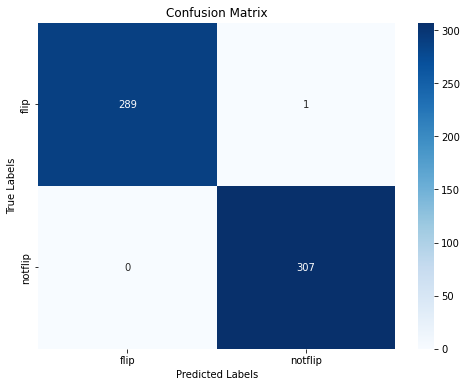

{'accuracy': 0.998324958123953, 'f1_score': 0.9983739837398374}

In [47]:
import seaborn as sns
eval_model(vgg_model, test_data)

In [48]:
vgg_model_path = '../models/vgg_model.h5'
vgg_model.save(vgg_model_path)
vgg_model_size = os.path.getsize(vgg_model_path) / (1024 * 1024)
print('Model size: ', vgg_model_size, 'MB')

Model size:  81.14962768554688 MB


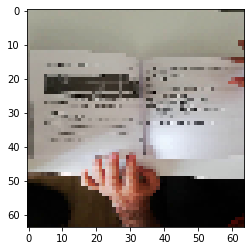

In [49]:
## too large
import matplotlib.pyplot as plt
imageToPredict = tf.keras.preprocessing.image.load_img(r'C:\Users\agnes\Documents\apziva_ai_residency\project4\data\images\testing\flip\0065_000000001.jpg', target_size=(64,64))
plt.imshow(imageToPredict)

In [53]:
import numpy as np
#Step2: Convert image to np array 
myImageNPArray = tf.keras.preprocessing.image.img_to_array(imageToPredict)
myImageNPArray.shape

# Step3: Make the image compatible for the model by adding n
myCompatibleImage = np.expand_dims(myImageNPArray, axis = 0)
myCompatibleImage.shape

(1, 64, 64, 3)

In [55]:

#Step4: Prediction
prediction = vgg_model.predict(myCompatibleImage)
print(prediction)

AttributeError: 'History' object has no attribute 'predict'